---
**It is generally said that American citizens like powerful and big cars. In general, an engine with more cylinders produces more power, while an engine with fewer cylinders gets better fuel economy.
In this little data science project we are going to analyze the 'mpg' dataset that comes with the Seaborn library.
The question we are trying to answer is whether it is true that US citizens prefer large cars with powerful engines to European or Japanese citizens.**

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# the Seaborn library comes with some datasets  
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# we are going to use the dataset 'mpg' "miles per gallon" to make a Heatmap

In [21]:
df_cars = sns.load_dataset('mpg')
df_cars.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [25]:
type(df_cars)

pandas.core.frame.DataFrame

In [26]:
df_cars.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [27]:
df_cars['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [34]:
df_cars.groupby(['origin']).count()[['name']]

,name
origin,
europe,70
japan,79
usa,249


In [35]:
df_cars['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [43]:
cylinders = cars.groupby(['origin'])['cylinders'].value_counts()
cylinders

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: cylinders, dtype: int64

In [45]:
cylinders = (cars.groupby(['origin'])['cylinders'].value_counts().unstack().fillna(0.0))
cylinders

cylinders,3,4,5,6,8
origin,,,,,
europe,0.0,63.0,3.0,4.0,0.0
japan,4.0,69.0,0.0,6.0,0.0
usa,0.0,72.0,0.0,74.0,103.0


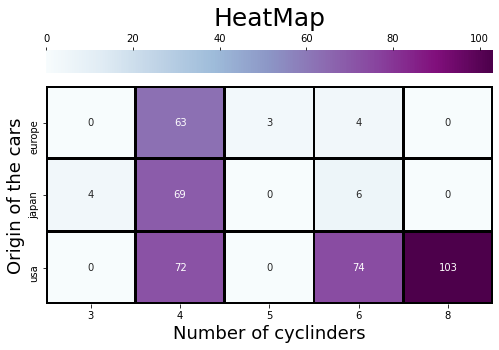

In [97]:
fig_1 = plt.figure(figsize=(8,5))


sns.heatmap(data = cylinders,
            linewidths = 1.9,
            linecolor = 'black',
            cmap="BuPu",
            annot=True,
            fmt='.3g',
            cbar_kws = dict(use_gridspec=False,
                            location="top")

            )
plt.title('HeatMap', fontsize=25, y=1.25)
plt.xlabel('Number of cyclinders', fontsize=18)
plt.ylabel('Origin of the cars', fontsize=18)


# notes: 
# annot: If True, write the data value in each cell.
# fmt: The seaborn heatmap fmt help to show annot with different formatting
# use_gridspec: In this case you need location="top" to place the colorbar on top. 
# Because colorbar by default positions the colorbar using a gridspec, which then does not allow for the location to be set,
# we need to turn that gridspec off (use_gridspec=False). FROM STACKOVERFLOW
plt.savefig('mpg_Heat_Map', bbox_inches='tight', facecolor='white', transparent=False)

plt.show()